In [ ]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import lil_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score, recall_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r --recursive "/content/drive/My Drive/DataScienceCompetitions/cross-sell-prediction/test.csv" "/content/"
!cp -r --recursive "/content/drive/My Drive/DataScienceCompetitions/cross-sell-prediction/train.csv" "/content/"
!cp -r --recursive "/content/drive/My Drive/DataScienceCompetitions/cross-sell-prediction/sample_submission_iA3afxn.csv" "/content/"

In [ ]:
train = pd.read_csv("train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

Text(0.5, 1.0, 'Annual_Premium')

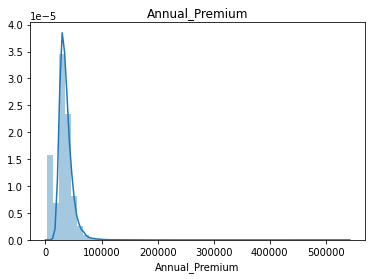

In [ ]:
sns.distplot(train['Annual_Premium'])
train['Annual_Premium'].plot
plt.title("Annual_Premium")

Text(0.5, 1.0, 'Policy_Sales_Channel')

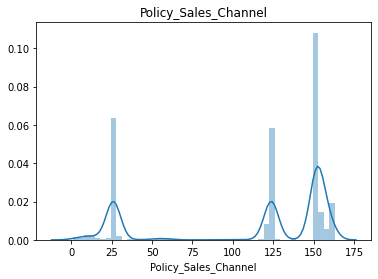

In [ ]:
sns.distplot(train['Policy_Sales_Channel'])
train['Policy_Sales_Channel'].plot
plt.title("Policy_Sales_Channel")

Text(0.5, 1.0, 'Vintage')

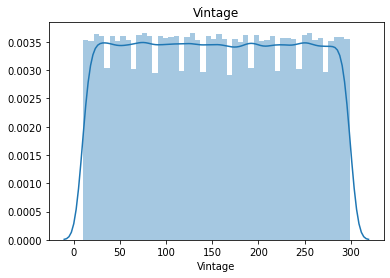

In [ ]:
sns.distplot(train['Vintage'])
train['Vintage'].plot
plt.title("Vintage")

Text(0.5, 1.0, 'Region_Code')

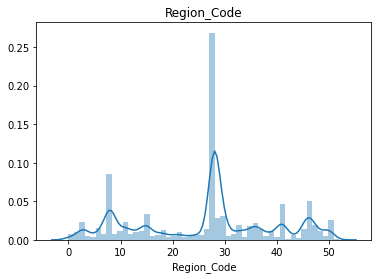

In [ ]:
sns.distplot(train['Region_Code'])
train['Region_Code'].plot
plt.title("Region_Code")

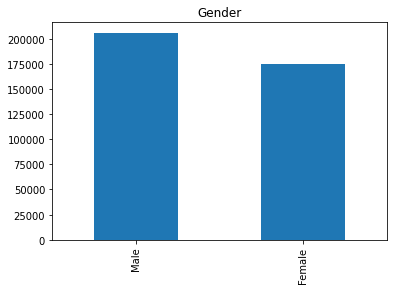

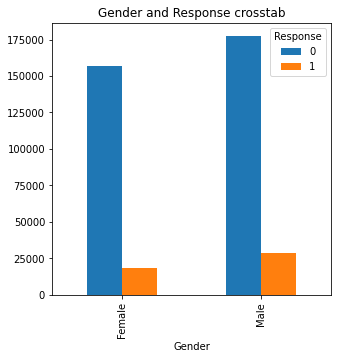

In [ ]:
train["Gender"].value_counts().plot.bar()
plt.title("Gender")


DL = pd.crosstab(train['Gender'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Gender and Response crosstab")
plt.show()


1    380297
0       812
Name: Driving_License, dtype: int64


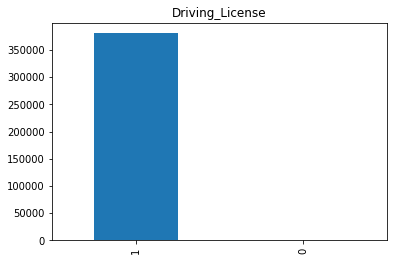

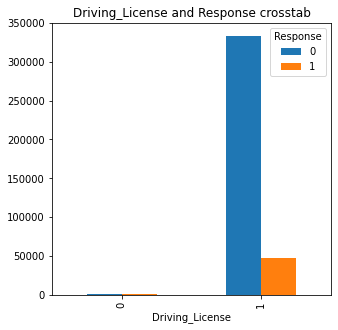

In [ ]:
train["Driving_License"].value_counts().plot.bar()
print(train["Driving_License"].value_counts())
plt.title("Driving_License")

DL = pd.crosstab(train['Driving_License'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Driving_License and Response crosstab")
plt.show()

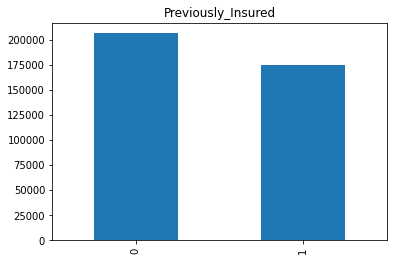

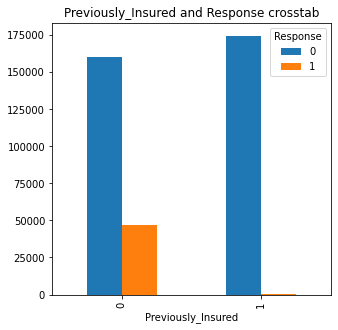

In [ ]:
train["Previously_Insured"].value_counts().plot.bar()
plt.title("Previously_Insured")


DL = pd.crosstab(train['Previously_Insured'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Previously_Insured and Response crosstab")
plt.show()

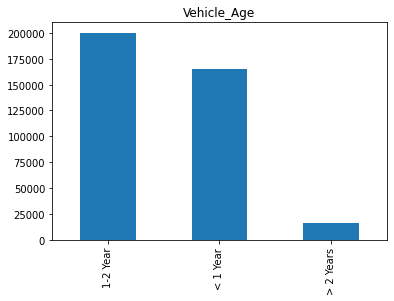

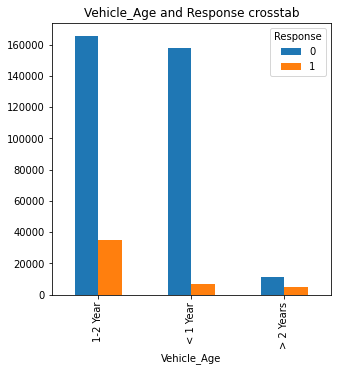

In [ ]:
train["Vehicle_Age"].value_counts().plot.bar()
plt.title("Vehicle_Age")


DL = pd.crosstab(train['Vehicle_Age'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Vehicle_Age and Response crosstab")
plt.show()

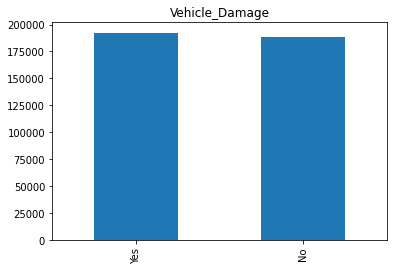

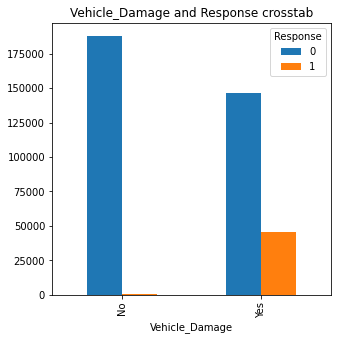

In [ ]:
train["Vehicle_Damage"].value_counts().plot.bar()
plt.title("Vehicle_Damage")


DL = pd.crosstab(train['Vehicle_Damage'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Vehicle_Damage and Response crosstab")
plt.show()

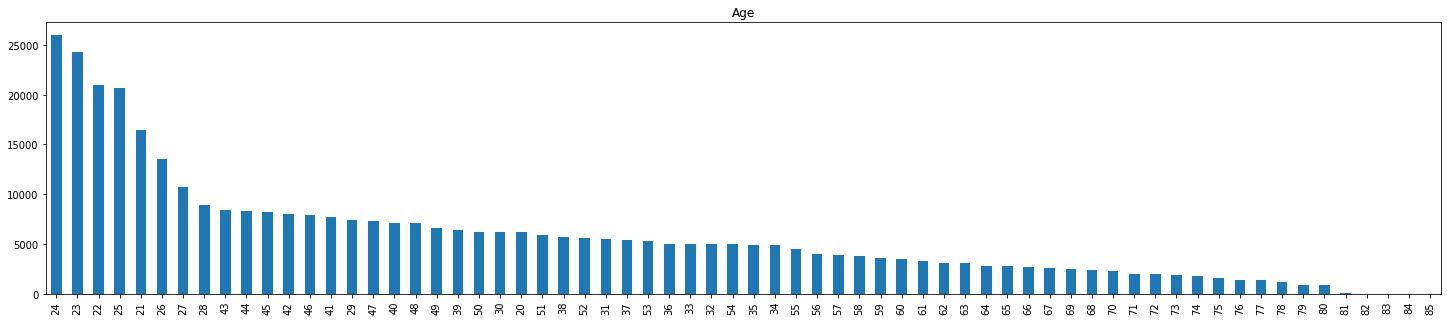

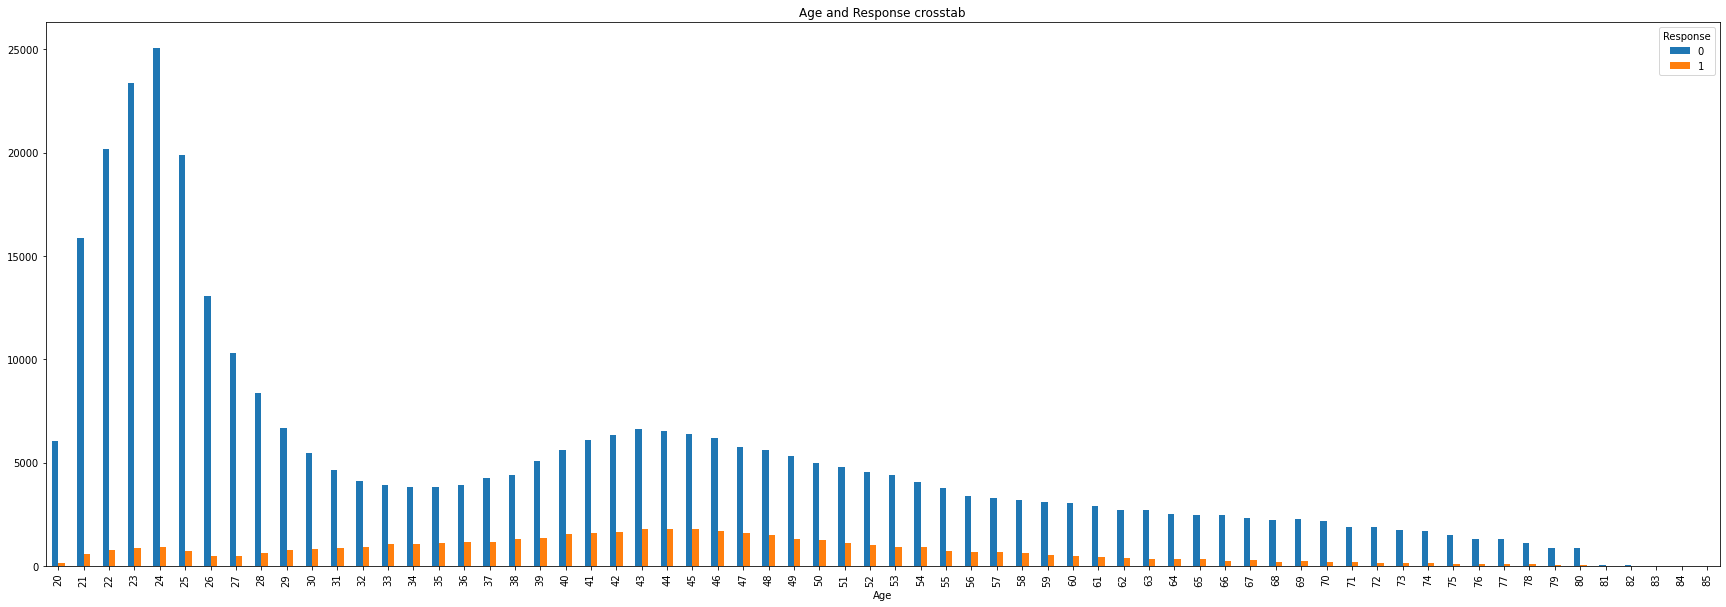

In [ ]:
train["Age"].value_counts().plot.bar(figsize=(25,5))
plt.title("Age")


DL = pd.crosstab(train['Age'], train['Response'])
DL.plot(kind="bar", figsize=(30, 10))
plt.title("Age and Response crosstab")
plt.show()

In [ ]:
arr = ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 
          'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
for i in  arr:
    for j in arr:
        if i!=j:
            df_group = train.groupby([i,j],as_index=False)
            print(len(df_group))
            print(df_group.size())
            print("********************************************")
            print("********************************************")
            print("********************************************")

In [ ]:
from collections import defaultdict,Counter
aa = defaultdict(int)
for i in train["Annual_Premium"]:
    aa[i] = aa[i]+1
aa = Counter(aa)
print(aa[40454])
aa.most_common(50)

11


[(2630, 64877),
 (69856, 140),
 (39008, 41),
 (38287, 38),
 (45179, 38),
 (43707, 36),
 (30117, 36),
 (36086, 35),
 (35074, 35),
 (33877, 34),
 (38452, 34),
 (49324, 33),
 (29333, 33),
 (31470, 32),
 (42118, 32),
 (34966, 32),
 (30105, 32),
 (70720, 32),
 (34339, 31),
 (37871, 31),
 (32112, 31),
 (35149, 31),
 (29675, 30),
 (29820, 30),
 (29882, 30),
 (28905, 30),
 (30123, 30),
 (33436, 30),
 (33002, 29),
 (32100, 29),
 (30747, 29),
 (30964, 29),
 (31036, 29),
 (42063, 29),
 (29639, 29),
 (29057, 29),
 (30449, 28),
 (32876, 28),
 (51281, 28),
 (34946, 28),
 (72544, 28),
 (33171, 28),
 (32598, 28),
 (38911, 28),
 (30441, 28),
 (32908, 28),
 (39443, 28),
 (27930, 28),
 (37142, 28),
 (35382, 28)]

In [ ]:
# get complete heatmap of all corelation coefficients
import seaborn as sns
df = train.drop(["id","train_flag"] , axis=1)
print(df.shape)
corr = df.corr()
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
df_train = pd.read_csv('/content/train.csv')

df_train['train_flag'] = 1
print(df_train.shape)

df_test = pd.read_csv('/content/test.csv')
df_test['train_flag'] = 0
df_test['Response'] = -1
print(df_test.shape)

df_data = pd.concat([df_train,df_test])
df_data = df_data.reset_index(drop=True)
df_data['Annual_Premium'] = np.log(df_data['Annual_Premium'])
print(df_data.shape)

df_data['Vintage'] = df_data['Vintage']/365


df_data["Region_Code"] = df_data["Region_Code"].astype("int") 
df_data["Annual_Premium"] = df_data["Annual_Premium"].astype("int") 
df_data["Policy_Sales_Channel"] = df_data["Policy_Sales_Channel"].astype("int")



df_data['Gender'] = df_data['Gender'].replace({'Male':1,'Female':0})
df_data['Vehicle_Damage'] = df_data['Vehicle_Damage'].replace({'Yes':1,'No':0})
df_data['Vehicle_Age']=df_data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})



# le = LabelEncoder()
# df_data["Gender"] = le.fit_transform(df_data["Gender"])

# le = LabelEncoder()
# df_data["Vehicle_Age"] = le.fit_transform(df_data["Vehicle_Age"])
# mapping_dict = dict(zip(le.transform(le.classes_) , le.classes_))

# le = LabelEncoder()
# df_data["Vehicle_Damage"] = le.fit_transform(df_data["Vehicle_Damage"])



# def agefunc(x):
#     if x <= 27 or x >= 75:
#         return 0
#     elif x <= 32 or x >= 49:
#         return 1
#     else:
#         return 2
# df_data["Age_label"] = df_data["Age"].apply(agefunc) 

df_data["DL_PI"]    = df_data.groupby(["Driving_License", "Previously_Insured"]).ngroup().astype('int')
df_data["DL_VD"]    = df_data.groupby(["Driving_License", "Vehicle_Damage"]).ngroup().astype('int')
df_data["DL_G"]     = df_data.groupby(["Driving_License", "Gender"]).ngroup().astype('int')
df_data["DL_VA"]    = df_data.groupby(["Driving_License", "Vehicle_Age"]).ngroup().astype('int')

# df_data["zz"]    = df_data.groupby(["Vehicle_Age", "Vehicle_Damage"]).ngroup().astype('int')


# df_data["AP_count"]    = df_data.groupby(["Annual_Premium"])["id"].transform('count')

df_data["region_per_premium"] = df_data.groupby(["Region_Code"])["Annual_Premium"].transform('mean')
df_data["region_sum_premium"] = df_data.groupby(["Region_Code"])["Annual_Premium"].transform('sum')
df_data["region_unique_premium"] = df_data.groupby(["Region_Code"])["Annual_Premium"].transform('nunique')

# df_data["vehicle_age_per_premium"] = df_data.groupby(["Vehicle_Age"])["Annual_Premium"].transform('mean')
# df_data["previously_insured_per_premium"] = df_data.groupby(["Previously_Insured"])["Annual_Premium"].transform('mean')
# df_data["age_per_premium"] = df_data.groupby(["Age"])["Annual_Premium"].transform('mean')
# df_data["gender_per_premium"] = df_data.groupby(["Gender"])["Annual_Premium"].transform('mean')
# df_data["vintage_per_premium"] = df_data.groupby(["Vintage"])["Annual_Premium"].transform('mean')
# df_data["Policy_Sales_Channel_per_premium"] = df_data.groupby(["Policy_Sales_Channel"])["Annual_Premium"].transform('mean')


df_data.head()                                            

(381109, 13)
(127037, 13)
(508146, 13)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,train_flag,DL_PI,DL_VD,DL_G,DL_VA,region_per_premium,region_sum_premium,region_unique_premium
0,1,1,44,1,28,0,2,1,10,26,0.594521,1,1,2,3,3,5,9.794078,1390142,6
1,2,1,76,1,3,0,1,0,10,26,0.501370,0,1,2,2,3,4,9.262693,114385,5
2,3,1,47,1,28,0,2,1,10,26,0.073973,1,1,2,3,3,5,9.794078,1390142,6
3,4,1,21,1,11,1,0,0,10,152,0.556164,0,1,3,2,3,3,9.477774,116842,5
4,5,0,29,1,41,1,0,0,10,152,0.106849,0,1,3,2,2,3,9.611680,234525,5


In [ ]:
df_data = df_data.sample(frac=1)
train = df_data[df_data["train_flag"] == 1]
test  = df_data[df_data["train_flag"] == 0]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print(train.shape , test.shape)
train

(381109, 20) (127037, 20)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,train_flag,DL_PI,DL_VD,DL_G,DL_VA,region_per_premium,region_sum_premium,region_unique_premium
0,239063,0,40,1,23,0,1,1,7,163,0.038356,0,1,2,3,2,4,9.224961,23948,4
1,210510,1,54,1,33,0,1,1,7,26,0.279452,1,1,2,3,3,4,9.449209,97393,4
2,240042,1,27,1,4,1,0,0,7,152,0.630137,0,1,3,2,3,3,9.186213,21854,4
3,189588,1,20,1,32,0,0,0,7,160,0.698630,0,1,2,2,3,3,9.231776,34573,4
4,53135,0,77,1,28,0,1,1,10,122,0.032877,0,1,2,3,2,4,9.794078,1390142,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,58641,0,30,1,33,0,1,1,10,156,0.216438,0,1,2,3,2,4,9.449209,97393,4
381105,64077,1,24,1,6,1,0,0,10,152,0.098630,0,1,3,2,3,3,9.478386,79154,4
381106,69930,1,25,1,28,1,0,0,10,152,0.041096,0,1,3,2,3,3,9.794078,1390142,6
381107,56667,1,40,1,41,0,1,1,10,156,0.756164,1,1,2,3,3,4,9.611680,234525,5


In [ ]:
def train_model(X , Y):
    # model = CatBoostClassifier( n_estimators=800, depth=4, verbose=0)
    # model = RandomForestClassifier()
    # model = XGBClassifier(n_estimators=800 , max_depth=4, verbose=0)
    # model = XGBClassifier(verbose=0)
    model = LGBMClassifier(max_depth=9 , n_estimators=120 , num_leaves=50, metric='auc')
    model.fit(X,Y)

    # skf = StratifiedKFold(n_splits=10)
    # print(skf)
    # for train_index, test_index in skf.split(X, Y):
    #     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #     y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    #     model.fit(X_train,y_train)
    #     print(roc_auc_score(y_test,  model.predict_proba(X_test)[:,1]))


    print(X.columns)
    return model







def prediction(model):
    X = test[array1]
    print(X.shape)
    print(X.columns)


    col1 = test["id"].values
    col2 = model.predict_proba(X)
    return col1,col2




In [ ]:
array1 = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 
          'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response', 'train_flag']
print(len(array1))

col_to_drop = ["id", "train_flag", "Response", "Vintage", "Driving_License"]
for i in col_to_drop:
    array1.remove(i)
print(len(array1))

col_to_add = ["DL_PI", "region_per_premium", "region_sum_premium"]
array1.extend(col_to_add)
print(len(array1))





X = train[array1]
Y = train["Response"]
print(X.shape, Y.shape)
m = train_model(X , Y)

13
8
11
(381109, 11) (381109,)
Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'DL_PI',
       'region_per_premium', 'region_sum_premium'],
      dtype='object')


In [ ]:
print(roc_auc_score( Y,  m.predict_proba(X)[:,1]))
col1,col2 =  prediction(m)
print(col1.shape , col2.shape)



# col3 = []
# if col2.shape == (len(df_test),1):
#     for i in range(len(df_test)):
#         col3.append(col2[i][0])
#     col2 = copy.deepcopy(col3)
# print(np.array(col2).shape)

0.8561411439304842
(127037, 11)
Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'DL_PI',
       'region_per_premium', 'region_sum_premium'],
      dtype='object')
(127037,) (127037, 2)


In [ ]:
c1 , c2 = [] , []
# c2 = map(lambda x: mapping_dict[x], col2)

diction = {'id': col1, 'Response': col2[:,1] } 
df_fin = pd.DataFrame(diction) 

filename = "ansq.csv"

df_fin.to_csv(filename , index=False)
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>